# Project Description

**You work for the OilyGiant mining company. Your task is to find the best place for a new well.**

Steps to choose the location:
- Collect the oil well parameters in the selected region: oil quality and volume of reserves;
- Build a model for predicting the volume of reserves in the new wells;
- Pick the oil wells with the highest estimated values;
- Pick the region with the highest total profit for the selected oil wells.

**Step 1.**

- Import our packeges and load dataset
- Data preprocessing

In [1]:
#Import our packeges
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import plotly.express as px
import random
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV
import warnings
warnings.filterwarnings('ignore')
import plotly.io as pio
pio.renderers.default = "svg"



from sklearn.metrics import   mean_squared_error, classification_report, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from scipy import stats as st

In [2]:
#Load our data sets
#First data set
oil_w_1 = pd.read_csv('geo_data_0.csv')
#Second data set
oil_w_2 = pd.read_csv('geo_data_1.csv')
#Third data set
oil_w_3 = pd.read_csv('geo_data_2.csv')
    

In [3]:
#Creating auxiliary functions
def mis_dup(data):
    print('Number of missing values in our data set:')
    print(data.isnull().sum())
    print()
    print('Number of duplicates in our data set:',data.duplicated().sum())

def show(data):
    print(data.info())
    print(data.describe())
    return data.head()

In [4]:
#Checking what we have in our first data set
show(oil_w_1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.500419       0.250143       2.502647      92.500000
std         0.871832       0.504433       3.248248      44.288691
min        -1.408605      -0.848218     -12.088328       0.000000
25%        -0.072580      -0.200881       0.287748      56.497507
50%         0.502360       0.250252       2.515969      91.849972
75%         1.073581       0.700646       4.715088     128.564089
max         2.362331       1.3437

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [5]:
#Looking for missing values and duplicates
mis_dup(oil_w_1)

Number of missing values in our data set:
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

Number of duplicates in our data set: 0


In [6]:
#Checking what we have in our second data set
show(oil_w_2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        1.141296      -4.796579       2.494541      68.825000
std         8.965932       5.119872       1.703572      45.944423
min       -31.609576     -26.358598      -0.018144       0.000000
25%        -6.298551      -8.267985       1.000021      26.953261
50%         1.153055      -4.813172       2.011479      57.085625
75%         8.621015      -1.332816       3.999904     107.813044
max        29.421755      18.7340

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [7]:
#Looking for missing values and duplicates
mis_dup(oil_w_2)

Number of missing values in our data set:
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

Number of duplicates in our data set: 0


In [8]:
#Checking what we have in our thir data set
show(oil_w_3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.002023      -0.002081       2.495128      95.000000
std         1.732045       1.730417       3.473445      44.749921
min        -8.760004      -7.084020     -11.970335       0.000000
25%        -1.162288      -1.174820       0.130359      59.450441
50%         0.009424      -0.009482       2.484236      94.925613
75%         1.158535       1.163678       4.858794     130.595027
max         7.238262       7.8448

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [9]:
#Looking for missing values and duplicates
mis_dup(oil_w_3)

Number of missing values in our data set:
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

Number of duplicates in our data set: 0


In [10]:
#Let's describe correlation between features and target 
#Creating our function
def corr(data,color):
    plt.figure(figsize = (15,8))
    return sns.heatmap(data.corr(),annot=True,cmap=color);

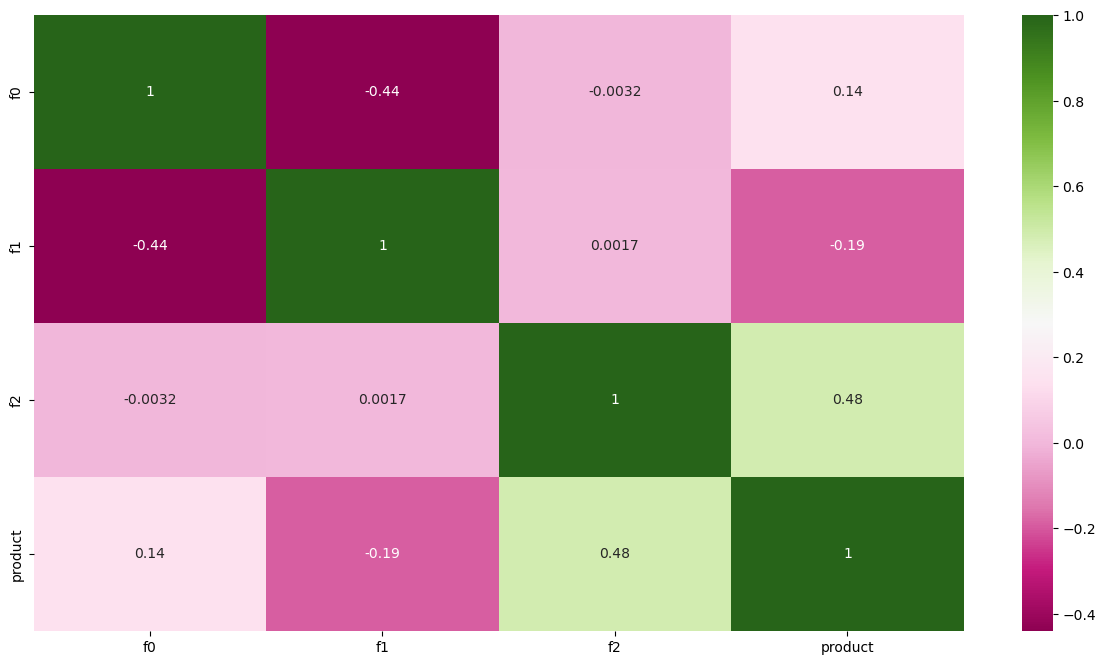

In [11]:
#First data set correletion heatmap
corr(oil_w_1,'PiYG');

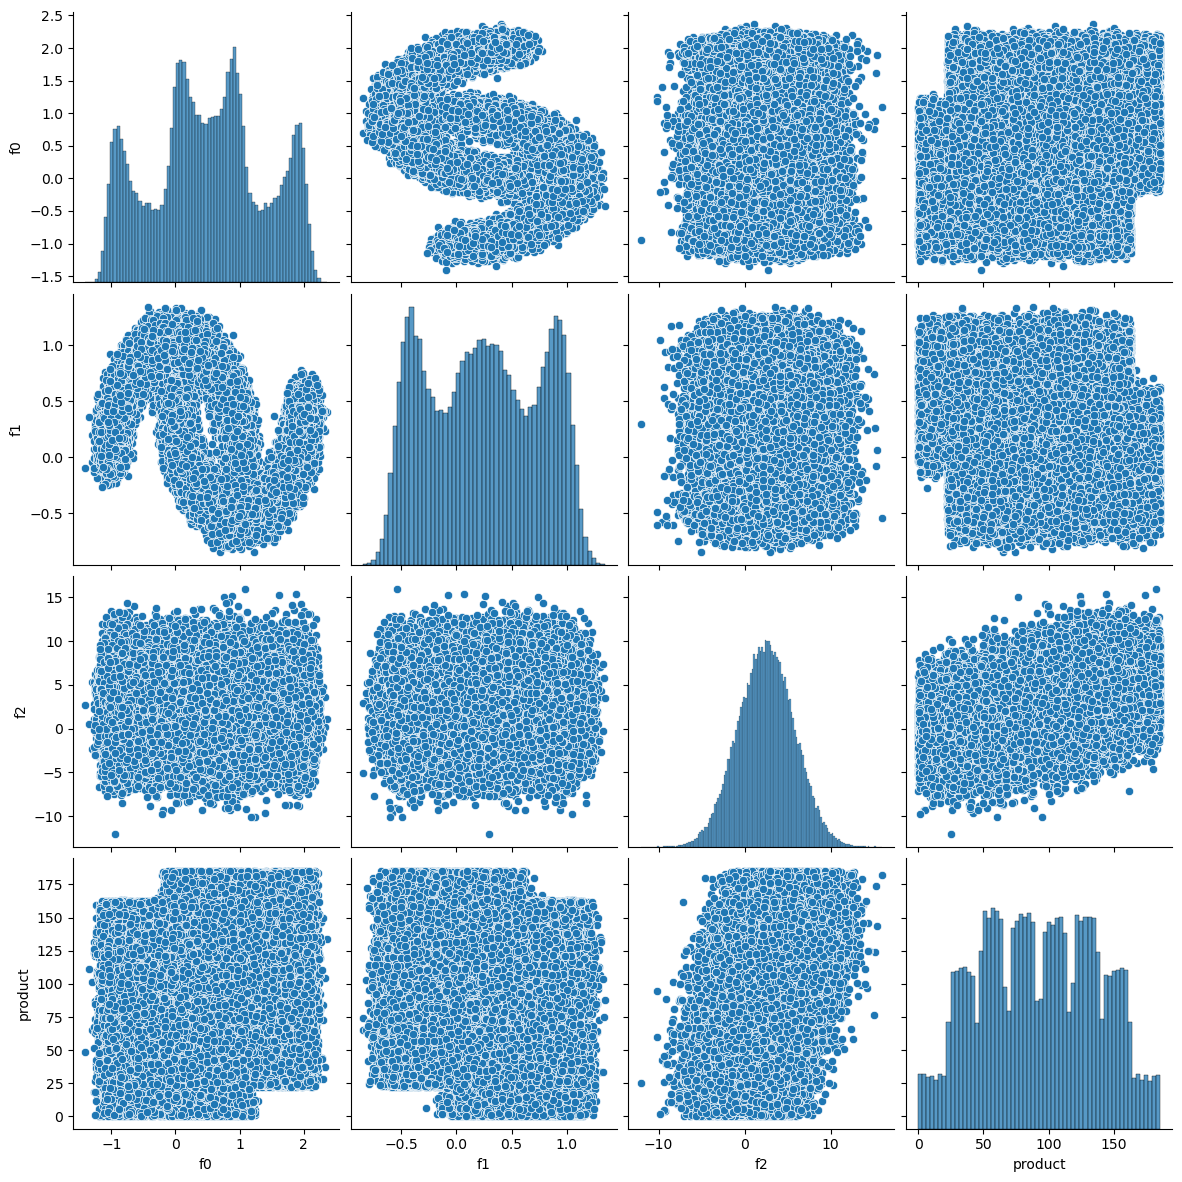

In [12]:
#add some visualization to a previous heatmap
sns.pairplot(oil_w_1, palette='Blues_d', size=3);

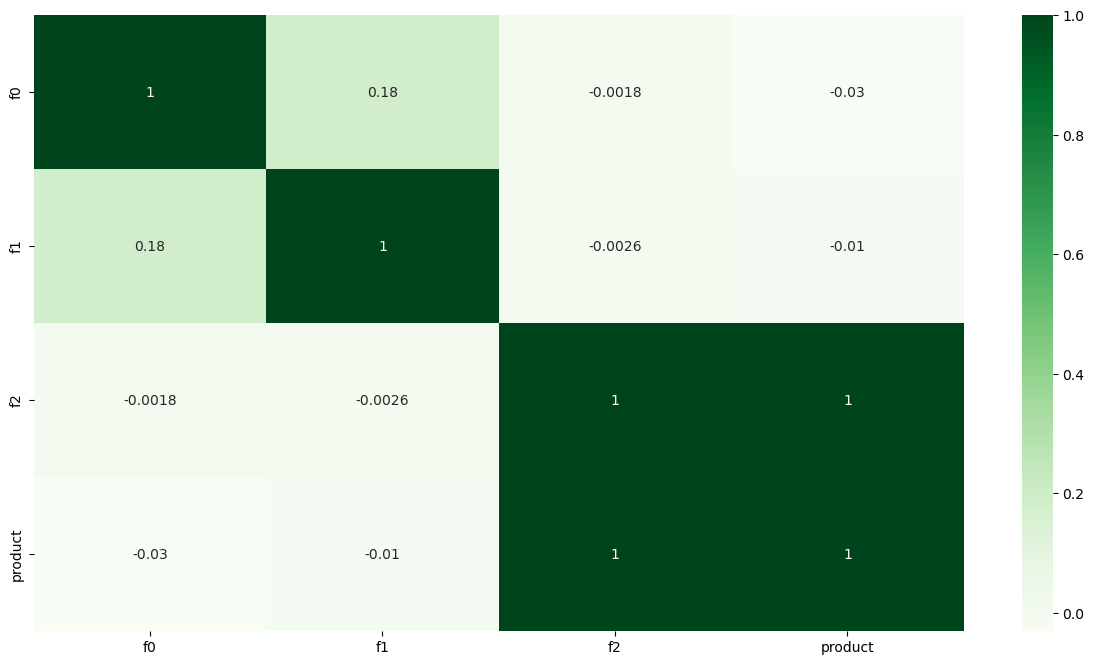

In [13]:
#Second data set correletion heatmap
corr(oil_w_2,'Greens');

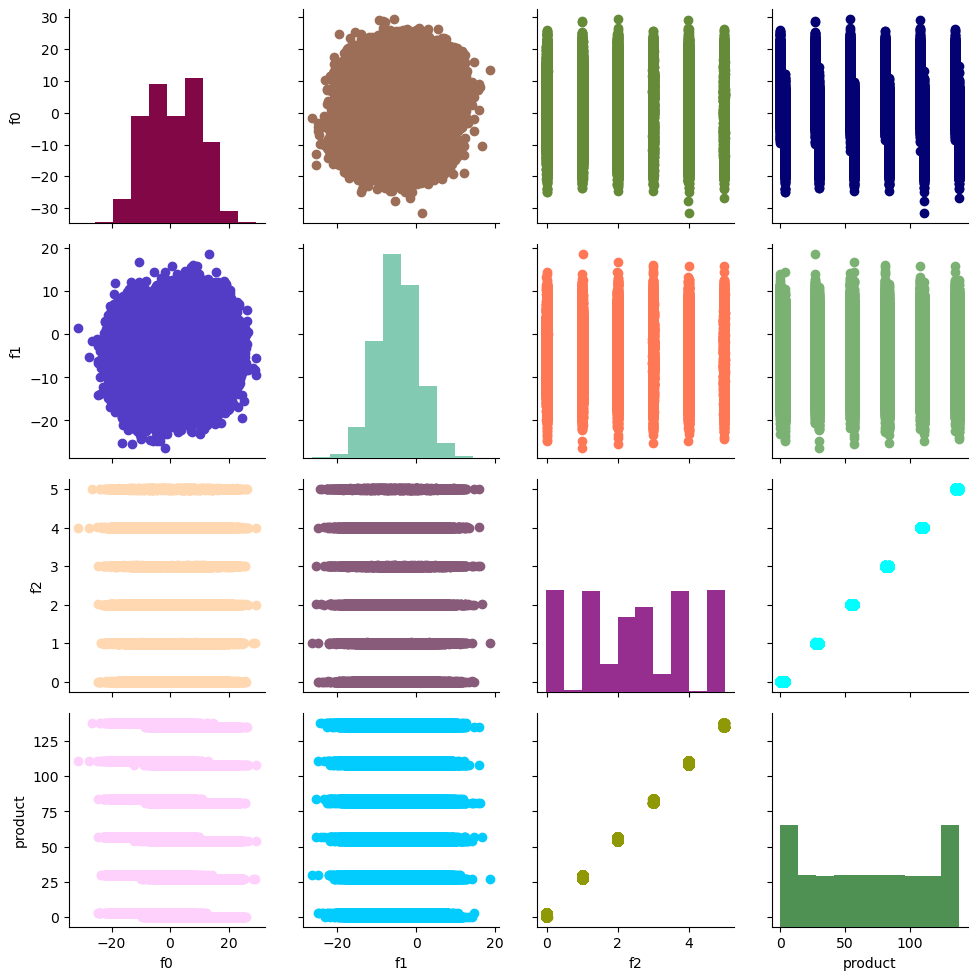

In [14]:
#Making looks beatifull our heatmap
colors = iter(['xkcd:red purple', 'xkcd:pale teal', 'xkcd:warm purple',
       'xkcd:light forest green', 'xkcd:blue with a hint of purple',
       'xkcd:light peach', 'xkcd:dusky purple', 'xkcd:pale mauve',
       'xkcd:bright sky blue', 'xkcd:baby poop green', 'xkcd:brownish',
       'xkcd:moss green', 'xkcd:deep blue', 'xkcd:melon',
       'xkcd:faded green', 'xkcd:cyan', 'xkcd:brown green',
       'xkcd:purple blue', 'xkcd:baby shit green', 'xkcd:greyish blue'])

def my_scatter(x,y, **kwargs):
    kwargs['color'] = next(colors)
    plt.scatter(x,y, **kwargs)

def my_hist(x, **kwargs):
    kwargs['color'] = next(colors)
    plt.hist(x, **kwargs)


g = sns.PairGrid(oil_w_2)
g.map_diag(my_hist)
g.map_offdiag(my_scatter);

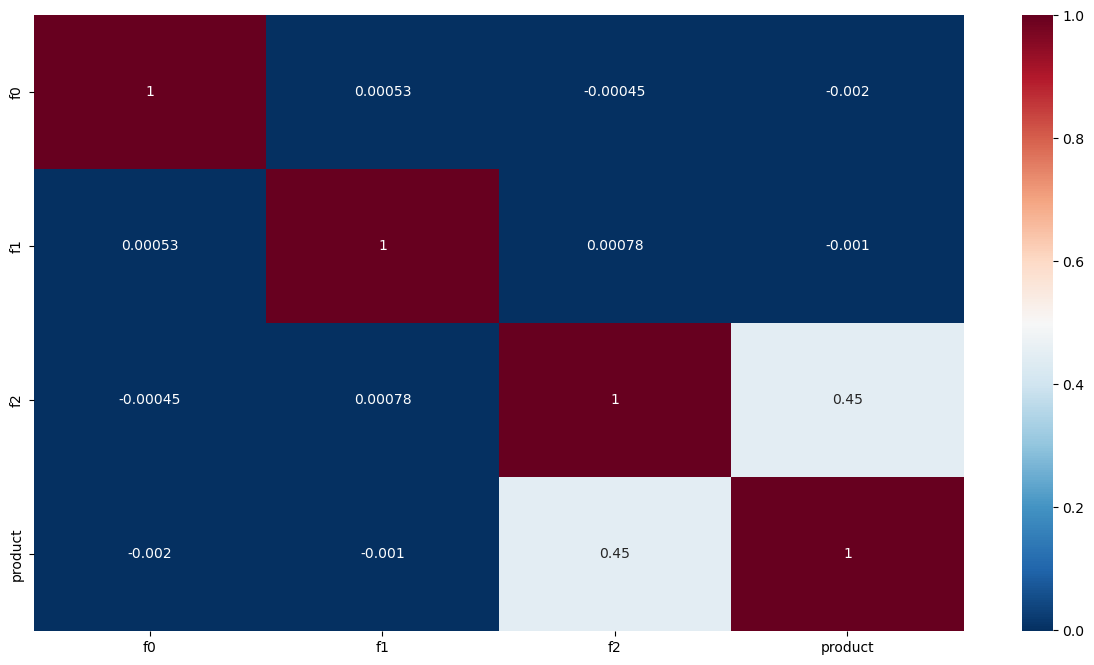

In [15]:
#Third data set correlation heatmap
corr(oil_w_3,'RdBu_r');

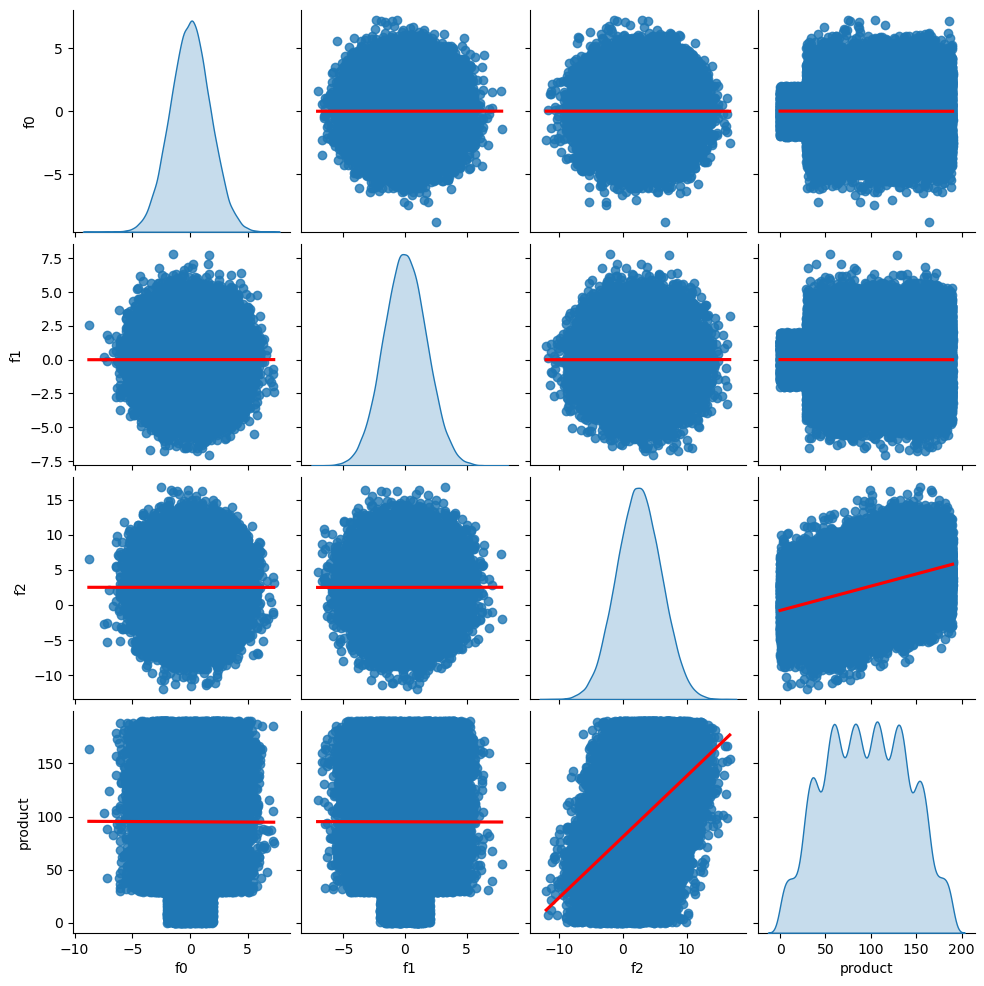

In [16]:
#Applying visualization to our third data set
sns.pairplot(oil_w_3, diag_kind='kde', kind='reg', plot_kws ={'line_kws':{'color':'red'}});

>**Conclusion**: From previous steps, we can see that we have clear data sets. The f2 usually has a higher correlation with the product column compared to other columns. Especially, in dataset 1 (df1) it is a perfect positive correlation. The distribution of the values in the product columns of datasets (regions) were not similar. Df0 and Df2 have a normal distribution, while df1 has a kind of sinusoidal distribution. Now we can move on and start working with our model and algorithm. For this project, we will use only one type of algorithm and it will be Linear Regression

**Step 2.**
Training and working with our Model here we will intouch with $Linear$ $Regression$ 
- First assign new variables $Features$, $Target$
- Splitting our new variables into training and valid sets
- Training and working with our model

In [17]:
#Working with our First Data set
features_1 = oil_w_1.drop(['id','product'],axis=1)
target_1 = oil_w_1['product']



In [18]:
#Dividing our data into a necessary train and valid sets 
features_train_1, features_valid_1, target_train_1, target_valid_1 = train_test_split(
    features_1, target_1, test_size=0.25, random_state=12345
)

print(features_train_1.shape)
print(features_valid_1.shape)
print(target_train_1.shape)
print(target_valid_1.shape)

(75000, 3)
(25000, 3)
(75000,)
(25000,)


In [19]:
#Standardisizing our variables by calling the StandardScaler method
#Creating a list with necessary columns
numeric = ['f0', 'f1', 'f2']

scaler= StandardScaler()
scaler.fit(features_train_1[numeric])
features_train_1[numeric] = scaler.transform(features_train_1[numeric])
features_valid_1[numeric] = scaler.transform(features_valid_1[numeric])
features_train_1.head()


,f0,f1,f2
27212,-0.544828,1.390264,-0.094959
7866,1.455912,-0.480422,1.209567
62041,0.260460,0.825069,-0.204865
70185,-1.837105,0.010321,-0.147634
82230,-1.299243,0.987558,1.273181


In [20]:
#Starting working with our Linear Regression algorithm
model_1 = LinearRegression()
model_1.fit(features_train_1,target_train_1)

predictions_1 = pd.Series(model_1.predict(features_valid_1), index=target_valid_1.index)


mse = mean_squared_error(target_valid_1, predictions_1)
print('MSE:', mse)
print('RMSE:', mse**0.5)
print('Average predicted value is: {}'.format(predictions_1.mean()))
print('R2 score is', r2_score(target_valid_1, predictions_1))

MSE: 1412.2129364399243
RMSE: 37.5794217150813
Average predicted value is: 92.59256778438008
R2 score is 0.27994321524487786


Coefficients:  [ 3.13227436 -7.10817695 21.42556383]
Variance score: 0.27994321524487786


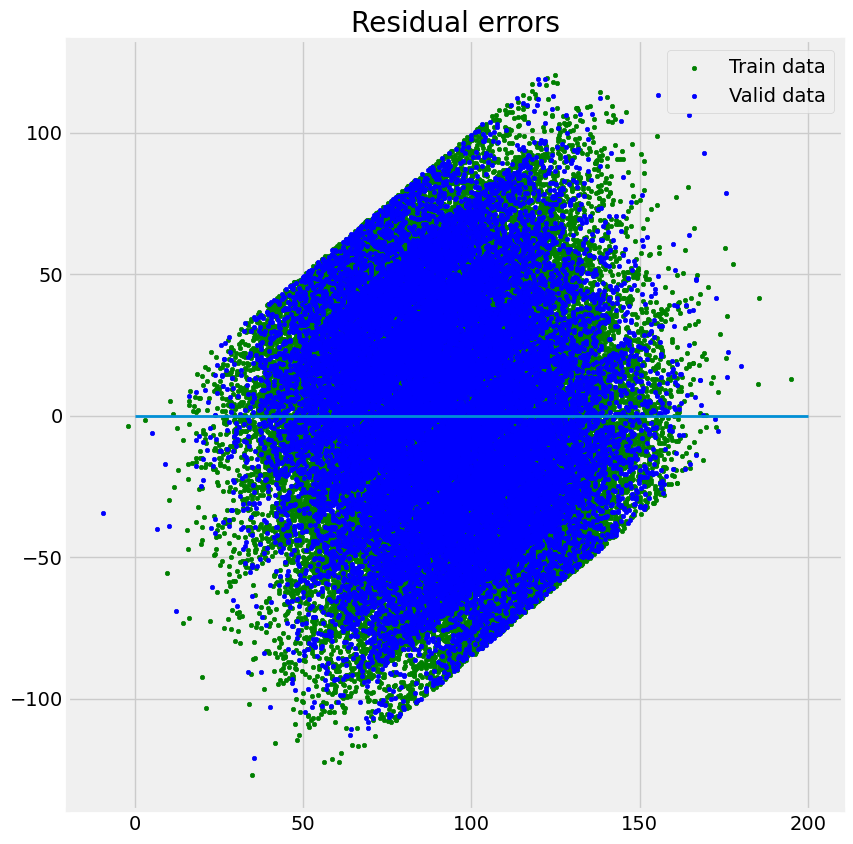

In [21]:
# regression coefficients
print('Coefficients: ', model_1.coef_)
 
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(model_1.score(features_valid_1, target_valid_1)))
 
# plot for residual error
plt.figure(figsize=(10,10))
# setting plot style
plt.style.use('fivethirtyeight')
 
# plotting residual errors in training data
plt.scatter(model_1.predict(features_train_1),
            model_1.predict(features_train_1) - target_train_1,
            color="green", s=10,
            label='Train data')
 
# plotting residual errors in test data
plt.scatter(model_1.predict(features_valid_1),
            model_1.predict(features_valid_1) -  target_valid_1,
            color="blue", s=10,
            label='Valid data')
 
# plotting line for zero residual error
plt.hlines(y=0, xmin=0, xmax=200, linewidth=2)
 
# plotting legend
plt.legend(loc='upper right')
 
# plot title
plt.title("Residual errors")
 
# method call for showing the plot
plt.show()


In [22]:
#Second data set
features_2 = oil_w_2.drop(['id','product'],axis=1)
target_2 = oil_w_2['product']

 
features_train_2, features_valid_2, target_train_2, target_valid_2 = train_test_split(
    features_2, target_2, test_size=0.25, random_state=12345
)

print(features_train_2.shape)
print(features_valid_2.shape)
print(target_train_2.shape)
print(target_valid_2.shape)

(75000, 3)
(25000, 3)
(75000,)
(25000,)


In [23]:
#Standardisizing our variables by calling the StandardScaler method

scaler= StandardScaler()
scaler.fit(features_train_2[numeric])
features_train_2[numeric] = scaler.transform(features_train_2[numeric])
features_valid_2[numeric] = scaler.transform(features_valid_2[numeric])
features_train_2.head()


,f0,f1,f2
27212,-0.850855,0.624428,0.296943
7866,1.971935,1.832275,0.294333
62041,1.079305,0.170127,-0.296418
70185,-1.512028,-0.887837,-0.880471
82230,-1.804775,-0.718311,-0.293255


In [24]:
#Starting working with our Linear Regression algorithm
model_2 = LinearRegression()
model_2.fit(features_train_2,target_train_2)

predictions_2 = pd.Series(model_2.predict(features_valid_2), index=target_valid_2.index)


mse = mean_squared_error(target_valid_2, predictions_2)
print('MSE:', mse)
print('RMSE:', mse**0.5)
print('Average predicted value is: {}'.format(predictions_2.mean()))
print('R2 score is', r2_score(target_valid_2, predictions_2))

MSE: 0.7976263360391154
RMSE: 0.8930992867756168
Average predicted value is: 68.7285468954458
R2 score is 0.9996233978805127


Coefficients:  [-1.29948295 -0.1129355  45.88603253]
Variance score: 0.9996233978805127


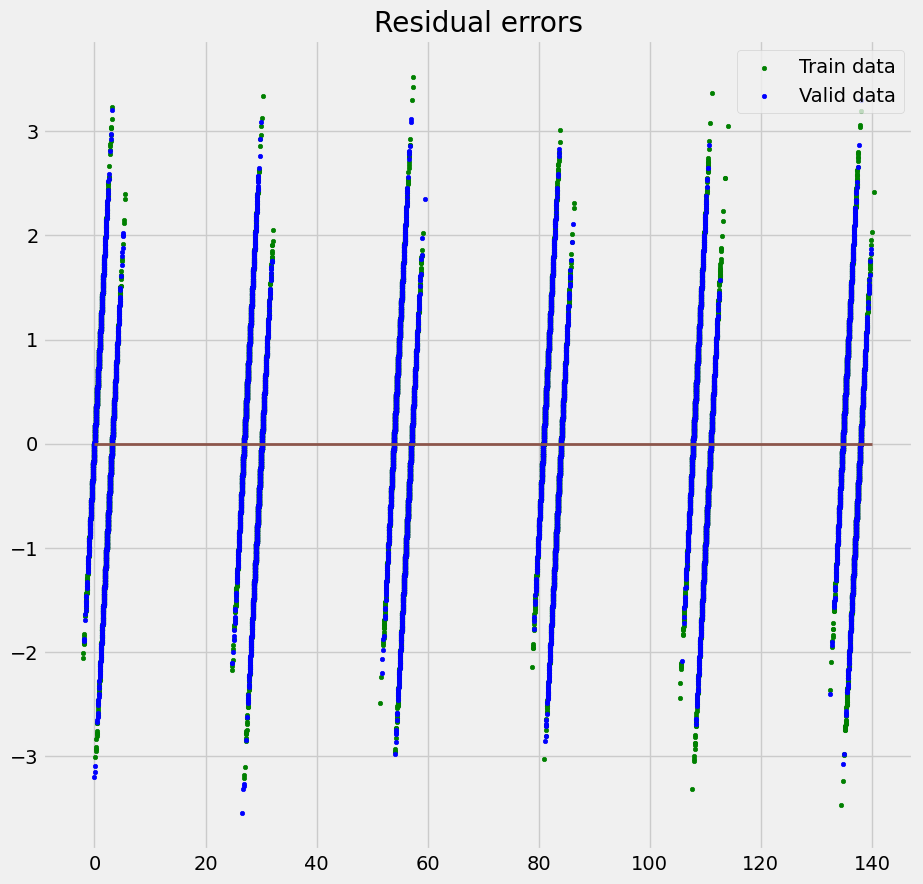

In [25]:
# regression coefficients
print('Coefficients: ', model_2.coef_)
 
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(model_2.score(features_valid_2, target_valid_2)))
 
# plot for residual error
plt.figure(figsize=(10,10))
# setting plot style
plt.style.use('fivethirtyeight')
 
# plotting residual errors in training data
plt.scatter(model_2.predict(features_train_2),
            model_2.predict(features_train_2) - target_train_2,
            color="green", s=10,
            label='Train data')
 
# plotting residual errors in test data
plt.scatter(model_2.predict(features_valid_2),
            model_2.predict(features_valid_2) -  target_valid_2,
            color="blue", s=10,
            label='Valid data')
 
# plotting line for zero residual error
plt.hlines(y=0, xmin=0, xmax=140, linewidth=2,colors = '#8c564b')
 
# plotting legend
plt.legend(loc='upper right')
 
# plot title
plt.title("Residual errors")
 
# method call for showing the plot
plt.show()


In [26]:
#Third data set creating our new Features and Target variables
features_3 = oil_w_3.drop(['id','product'],axis=1)
target_3 = oil_w_3['product']

#Splitting our data into train and valid sets
features_train_3, features_valid_3, target_train_3, target_valid_3 = train_test_split(
    features_3, target_3, test_size=0.25, random_state=12345
)

print(features_train_3.shape)
print(features_valid_3.shape)
print(target_train_3.shape)
print(target_valid_3.shape)

(75000, 3)
(25000, 3)
(75000,)
(25000,)


In [27]:
#Standartize our sets
numeric = ['f0', 'f1', 'f2']

scaler= StandardScaler()
scaler.fit(features_train_3[numeric])
features_train_3[numeric] = scaler.transform(features_train_3[numeric])
features_valid_3[numeric] = scaler.transform(features_valid_3[numeric])
features_train_3.head()

,f0,f1,f2
27212,-0.526160,0.776329,-0.400793
7866,-0.889625,-0.404070,-1.222936
62041,-1.133984,0.208576,0.296765
70185,1.227045,1.570166,-0.764556
82230,-0.194289,0.878312,0.840821


In [28]:
#Creating and training our model
model_3 = LinearRegression()
model_3.fit(features_train_3,target_train_3)

predictions_3 = pd.Series(model_3.predict(features_valid_3), index=target_valid_3.index)

mse = mean_squared_error(target_valid_3, predictions_3)
print('MSE:', mse)
print('RMSE:', mse**0.5)
print('Average predicted value is: {}'.format(predictions_3.mean()))
print('R2 score is', r2_score(target_valid_3, predictions_3))

MSE: 1602.3775813236196
RMSE: 40.02970873393434
Average predicted value is: 94.96504596800506
R2 score is 0.20524758386040443


Coefficients:  [ 0.0535809  -0.07250488 19.81965193]
Variance score: 0.20524758386040443


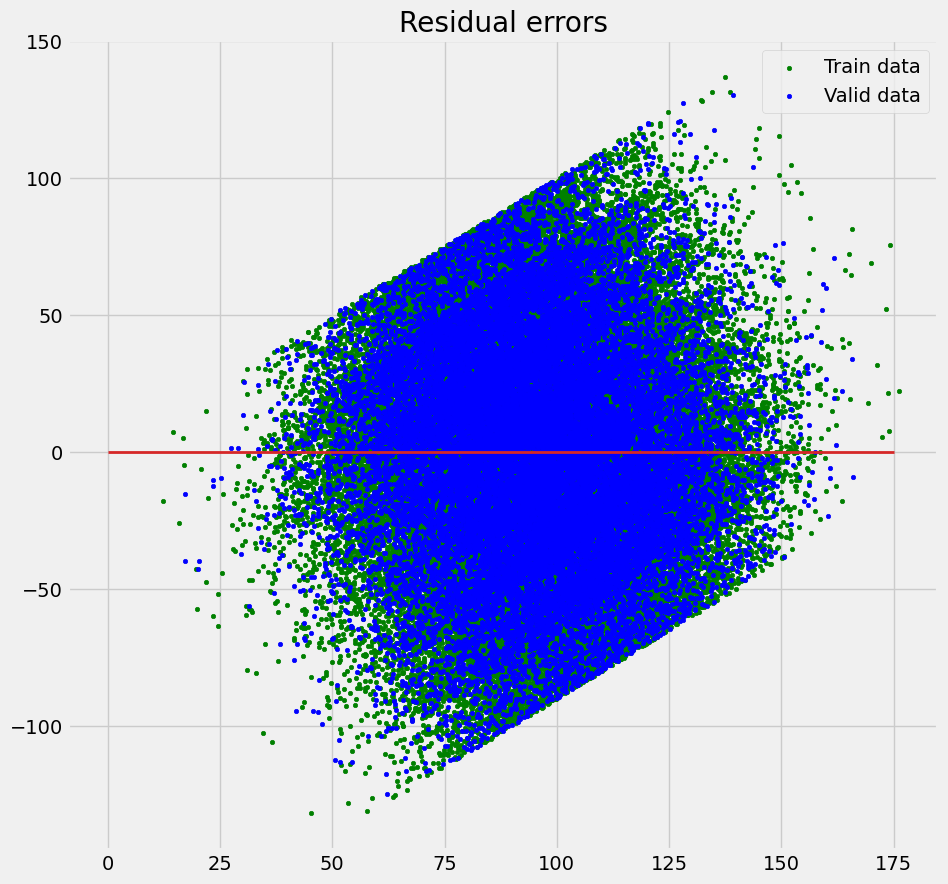

In [29]:
# regression coefficients
print('Coefficients: ', model_3.coef_)
 
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(model_3.score(features_valid_3, target_valid_3)))
 
# plot for residual error
plt.figure(figsize=(10,10))
# setting plot style
plt.style.use('fivethirtyeight')
 
# plotting residual errors in training data
plt.scatter(model_3.predict(features_train_3),
            model_3.predict(features_train_3) - target_train_3,
            color="green", s=10,
            label='Train data')
 
# plotting residual errors in test data
plt.scatter(model_3.predict(features_valid_3),
            model_3.predict(features_valid_3) -  target_valid_3,
            color="blue", s=10,
            label='Valid data')
 
# plotting line for zero residual error
plt.hlines(y=0, xmin=0, xmax=175, linewidth=2,colors = '#d62728')
 
# plotting legend
plt.legend(loc='upper right')
 
# plot title
plt.title("Residual errors")
 
# method call for showing the plot
plt.show()


>Conclusion: After we evaluated all our data by using LinearRegression model we can clearly say that te best R2 scores and the lowes number of RMSE value we have in our second data set and it can be referred that 99% of the changeability of the dependent output attribute can be explained by the model while the remaining 1 % of the variability is still unaccounted for. But from another hand we see that the variance score is huge which tells us that in our data we have a big spread of values from the mean value, we can see this from the ressidual errors scatterplots.

**Step 3. Prepare for profit calculation** 
- 3.1. Storing all key values for calculations in separate variables.
- 3.2. Calculating the volume of reserves sufficient for developing a new well without losses. Compare the obtained value with the average volume of reserves in each region.
- 3.3. Providing the findings about the preparation for profit calculation step.

In [30]:
#Number of weils in Region
points = 500
#Number of top weils in Region
best_points = 200
#The budget for development of 200 oil wells is 100 USD million.
budget_all = 100000000
#budget for development of 1 oil well
budget_one = budget_all / best_points
#The revenue from one unit of product 
rev_one = 4500
#Calculating the volume of reserves sufficient for developing a new well without losses. 
vol_res = budget_one / rev_one

print('A well should produce at least', round(vol_res, 2), 'thousand barrels in order to be profitable.')


A well should produce at least 111.11 thousand barrels in order to be profitable.


> Conclusion:  From previous task we made conlcusion that if we want t to be profitable with our new wells, a well should produce at least 111.11 thousand barrels of the product. In previous sections, we observed that the average production volume of all regions was quite low (e.g. 92.72, 68.92, 94.96 k barrels). But that does not necessarily mean, wells are not profitable, because to check the profitability of wells, we need to find out the distribution of profits of wells, especially best-performing wells. This is what we are going to do in the next section.

**Step 4.**
- Write a function to calculate profit from a set of selected oil wells and model predictions:

In [31]:
#Our profit function wihout losses
def profit(target,predictions,best_points):
    pred_sorted = predictions.sort_values(ascending=False)
    selected = target[pred_sorted.index][:best_points]
    total_rev = selected.sum()*rev_one
    profit = (total_rev - (budget_one * best_points)) / 10**6
    return profit

profit_rev = profit(target_valid_1,predictions_1,200)
print("Profit for the obtained volume of reserves from first region is :{} mil.".format(round(profit_rev,2)))

Profit for the obtained volume of reserves from first region is :33.21 mil.


In [32]:
profit_rev = profit(target_valid_2,predictions_2,200)
print("Profit for the obtained volume of reserves from second region is :{} mil.".format(round(profit_rev,2)))

Profit for the obtained volume of reserves from second region is :24.15 mil.


In [33]:
profit_rev = profit(target_valid_3,predictions_3,200)
print("Profit for the obtained volume of reserves from third region is :{} mil.".format(round(profit_rev,2)))

Profit for the obtained volume of reserves from third region is :27.1 mil.


>Conclusion: Our profit function tells us that the best region to grow money is first, but we didn't take into account losses, that is why we can't be sure in 100% on this step what region is more profitable. Let's move on to the last step of our project and will find which region is the best to make a profit.

**Step 5.**
Calculate risks and profit for each region:
- We will use the bootstrapping technique with 1000 samples to find the distribution of profit.
- Calculate the average profit, 95% confidence interval and risk of losses. 

In [34]:

def risk_pro(target,pred):
    state = np.random.RandomState(12345)

    values = []
    for i in range(1000):
        target_subsample = target.sample(n=points, replace=True, random_state=state)
        pred_subsample = pred[target_subsample.index]
        profits = profit(target_subsample,pred_subsample,best_points)
        values.append(profits)



    values = pd.Series(values)
    #95% confidence interval
    confid_int = (round(values.quantile(0.025), 3), round(values.quantile(0.975)))
    #risk of losses
    risk = round(sum(values <0)/len(values),3)
    #Mean value
    mean = round(values.mean(),3)
    print("Average revenuefrom the first 200 weils is: {} mill.USD".format(mean))
    print('95% confidence interval:{} mill.USD'.format(confid_int))
    print('The risk of losses with negative profit is equal to: {:.2%}'.format(risk))


In [35]:
#Analyzing first region
risk_pro(target_valid_1,predictions_1)

Average revenuefrom the first 200 weils is: 4.259 mill.USD
95% confidence interval:(-1.021, 9) mill.USD
The risk of losses with negative profit is equal to: 6.00%


In [36]:
#Analyzing second region
risk_pro(target_valid_2,predictions_2)

Average revenuefrom the first 200 weils is: 5.152 mill.USD
95% confidence interval:(0.689, 9) mill.USD
The risk of losses with negative profit is equal to: 1.00%


In [37]:
#Analyzing third region
risk_pro(target_valid_3,predictions_3)

Average revenuefrom the first 200 weils is: 4.35 mill.USD
95% confidence interval:(-1.289, 10) mill.USD
The risk of losses with negative profit is equal to: 6.40%


> Conclusion:
Using 1000 bootstrapping cycles, out of random 500 wells, 200 wells with the highest predictions were selected and profit has been calculated. Following observations were obtained:

|Region |Avg. Profit (mln USD)|95 % Conf. Interval (mln USD)|Risk (%) |
|-------|---------------------|-----------------------------|---------|
|Region1|4.259                 |-0.102 - 9                  |6.00     |
|Region2|5.129                 |0.689 - 9                   |1.00    |
|Region3|4.35                 |-1.289  - 10                  |6.40     |

Based on the above observations, **region2 has the highest profit** and the least risk (only 1.00%). Other regions have lesser profits and higher risks, particularly, region1 has comparably very low profit (4.259 mln USD) and higher risk (6.0%).

With less risk and higher profit, **region2 looks more promising, compared to region1 and region3**.
